In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pathlib

In [84]:
method = 'region_growing'
rpi = 'h2r1'
format = 'jpg'

path_to_processed = sorted(glob.glob('a_processed_images/'+ method + '/' + rpi + '/*.' + format))
path_to_original = sorted(glob.glob('annotated_masks/' + rpi + '/*.jpg'))
names = [pathlib.Path(x).stem for x in path_to_original]

path_to_final_mask = 'a_found_masks/' + method + '/' + rpi + '/'
print(names)

['hive2_rpi1_240419-194501Z', 'hive2_rpi1_240419-211101Z', 'hive2_rpi1_240420-023401Z', 'hive2_rpi1_240420-223101Z', 'hive2_rpi1_240421-144901Z', 'hive2_rpi1_240421-202101Z', 'hive2_rpi1_240422-052501Z', 'hive2_rpi1_240422-102301Z', 'hive2_rpi1_240423-011901Z', 'hive2_rpi1_240423-034701Z', 'hive2_rpi1_240423-160401Z', 'hive2_rpi1_240423-190201Z', 'hive2_rpi1_240423-201001Z', 'hive2_rpi1_240424-155701Z', 'hive2_rpi1_240425-172701Z', 'hive2_rpi1_240426-024601Z', 'hive2_rpi1_240426-082101Z', 'hive2_rpi1_240426-094801Z', 'hive2_rpi1_240426-201901Z', 'hive2_rpi1_240427-093201Z', 'hive2_rpi1_240427-124801Z']


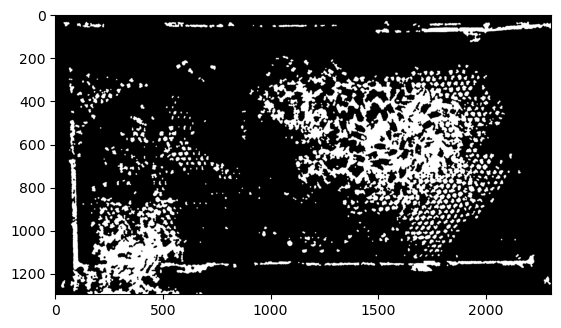

In [85]:
plt.imshow(cv2.imread(path_to_processed[0]))

In [86]:
processed_imgs = [cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in path_to_processed]
n = 0
for mask in processed_imgs:
    final_mask = np.ones_like(mask)*255
    if method == 'ilastik':
        mask = cv2.threshold(mask, 1.5, 255, cv2.THRESH_BINARY)[1]
        mask = ~mask
    img_contour = (mask).astype(np.uint8) #convert to uint8 because findContours only accepts uint8
    contours, _ = cv2.findContours(img_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
    contours = [x for x in contours if cv2.contourArea(x) > 120000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2] #get the 2 biggest contour
    img_contour = cv2.cvtColor(img_contour, cv2.COLOR_GRAY2BGR) #convert to BGR because drawContours only accepts BGR
    cv2.drawContours(final_mask, contours, -1, (0), -1) #draw the biggest contour
    cv2.imwrite(path_to_final_mask + names[n] + '_final_mask.jpg', final_mask)
    n += 1

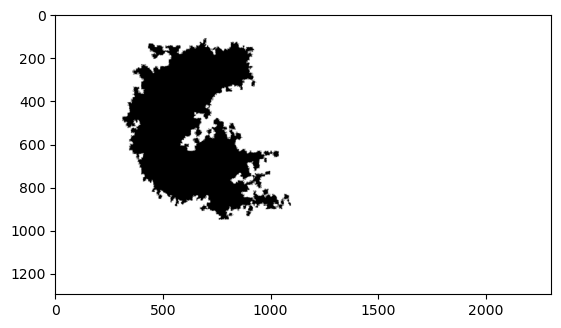

In [74]:
plt.imshow(cv2.imread(path_to_final_mask + names[0] + '_final_mask.jpg'))

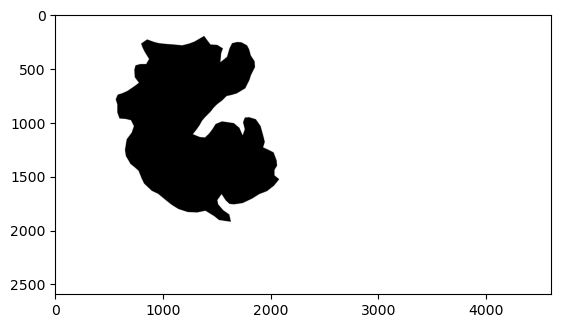

In [70]:
plt.imshow(cv2.imread(path_to_original[0]))